https://theailearner.com/tag/cv2-getperspectivetransform/

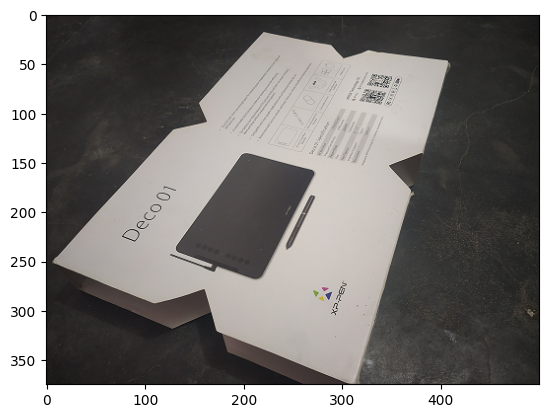

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
 
# Load the image
img = cv2.imread('open_cv_files/deco1-1.jpg') 
 
# Create a copy of the image
img_copy = np.copy(img)
 
# Convert to RGB so as to display via matplotlib
# Using Matplotlib we can easily find the coordinates
# of the 4 points that is essential for finding the 
# transformation matrix
img_copy = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
 
plt.imshow(img_copy)

In [8]:
pt_A = [3, 250]
pt_B = [300, 355]
pt_C = [400, 20]
pt_D = [220, 4]

In [9]:
# Here, I have used L2 norm. You can use L1 also.
width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
width_BC = np.sqrt(((pt_B[0] - pt_C[0]) ** 2) + ((pt_B[1] - pt_C[1]) ** 2))
maxWidth = max(int(width_AD), int(width_BC))


height_AB = np.sqrt(((pt_A[0] - pt_B[0]) ** 2) + ((pt_A[1] - pt_B[1]) ** 2))
height_CD = np.sqrt(((pt_C[0] - pt_D[0]) ** 2) + ((pt_C[1] - pt_D[1]) ** 2))
maxHeight = max(int(height_AB), int(height_CD))

In [10]:
input_pts = np.float32([pt_A, pt_B, pt_C, pt_D])
output_pts = np.float32([[0, 0],
                        [0, maxHeight - 1],
                        [maxWidth - 1, maxHeight - 1],
                        [maxWidth - 1, 0]])

In [11]:
# Compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts,output_pts)

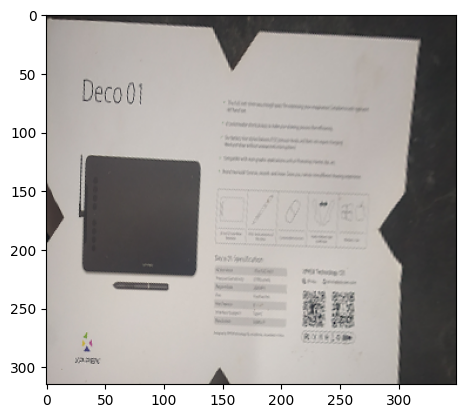

In [12]:
out = cv2.warpPerspective(img,M,(maxWidth, maxHeight),flags=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))